# speeding up python3 Code 
- Fast Filtering and Slow Loop

### 분석가로서 가장 많이 만나는 데이터셋에 대한 for loop 최적화 대 꿀팁 전수

## Fast Filtering of DataSets

In [63]:
import numpy as np

def random_array(size, dim=3):
    """
    GENERATE A RANDOM ARRAY OF SIZE AND DIMENSION DIM
    """
    return np.random.rand(int(size), dim)

In [69]:
def loop(array):
    """
    Takes Numpy array and isolates all point that are within
    [0.2, 0.4] for first column and between [0.4, 0.6] for second column
    """
    filtered_list = []
    
    for i in range(len(array)):
        # Check if the point is within the rectangle
        if ((array[i][0] >= 0.2)
            and (array[i][1] >= 0.4)
            and (array[i][0] <= 0.4)
            and (array[i][1] <= 0.6)):
            filtered_list.append(array[i])
                
    return np.array(filtered_list)

In [70]:
# Generate a random array of size 1e5
array = random_array(1e5)

In [94]:
filtered_array = loop(array)

In [72]:
print('Loop:\t', end='')
%timeit loop(array)

Loop:	36.3 ms ± 1.41 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


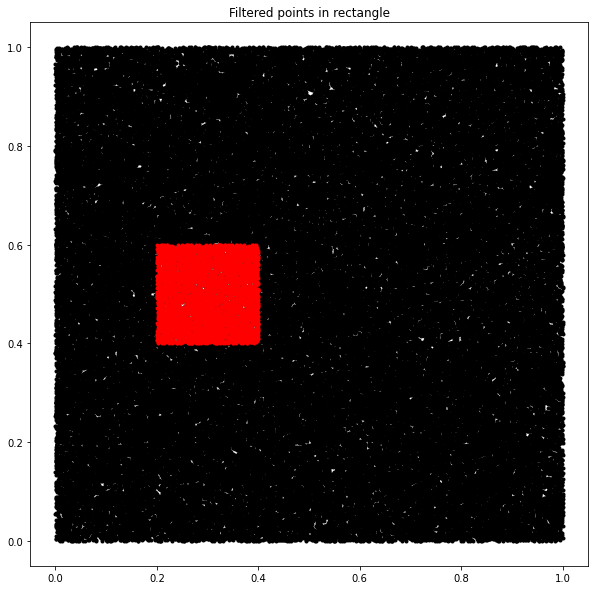

In [84]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Filtered points in rectangle')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(filtered_array[:, 0], filtered_array[:, 1], 'r.')
plt.show()

# 속도 향상 version 1 
- 특별한 함수 없이 형타입 변경으로도 속도 빨라집니다

- a list of tuples instead of a numpy array.
- tuple은 list 보다 빠르게 설계 되어 있다

- 플은 메모리 상에 하나의 블록으로 저장되지만, 
- 리스트는 두 개의 블록에 각각 오브젝트에 대한 정보와 데이터가 저장되기 때문에
- 튜플보다는 생성되는 속도가 느립니다.

- 추가 변경 삭제, 정렬이 필요할시 리스트
- 리스트 변경이 필요 없다면 튜플로 사용

- tuple 인덱싱->  분련속하게 접근이 불가 한 단점 -> pandas 로 해결
- tuple[0,1] -> 작동 안됨

In [85]:
def python_loop(random_list):
    """
    Takes a list of tuples and isolates all points that are within [0.2,0.4]
    for the first dimension and between [0.4,0.6] for the second dimension.
    """
    filtered_list = []
    for i in range(len(random_list)):
        if ((random_list[i][0] >= 0.2)
            and (random_list[i][1] >= 0.4)
            and (random_list[i][0] <= 0.4)
            and (random_list[i][1] <= 0.6)):
            filtered_list.append(random_list[i])
    return filtered_list

# Convert the numpy array to a list of tuples
python_list = list(map(tuple, array))

print('Python loop:\t', end='')
%timeit python_loop(python_list)

Python loop:	15.8 ms ± 34.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [120]:
filtered_array = python_loop(python_list)

In [ ]:
import pandas as pd

In [124]:
filtered_array = pd.DataFrame(filtered_array)

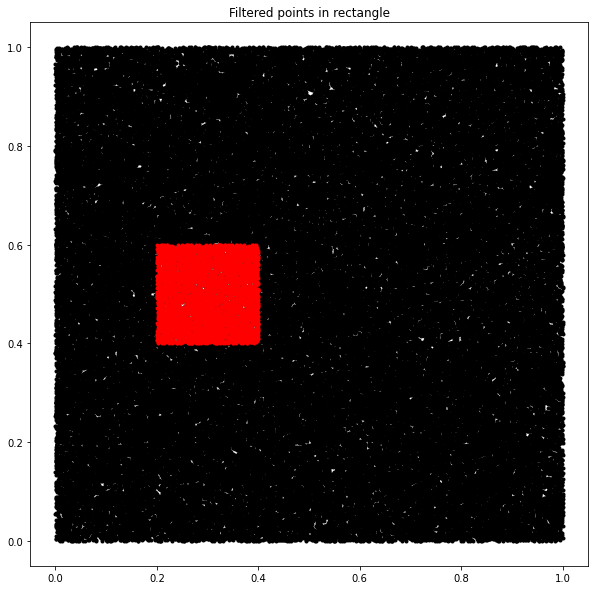

In [129]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
plt.title('Filtered points in rectangle')
plt.plot(array[:, 0], array[:, 1], 'k.')
plt.plot(filtered_array.loc[:, 0], filtered_array.loc[:, 1], 'r.')
plt.show()

## Python Functions: List comprehension, Map and Filter

- List comprehensions are known to perform, in general, better than for loops as they do not need to call the append function at each iteration.

# 우선 바이너리로 한번 봐볼까용?

- 파이썬은 스크립트 언어지만 바이너리 코드로 변환이 가능
- 성능 비교할때 바이너리 코드 확인한다

In [131]:
import dis

In [132]:
def hello_world():
    print("hello world!")

In [133]:
dis.dis(hello_world) # pop top 데이터 스텍에서 가장 위에 데이터를 pop

  2           0 LOAD_GLOBAL              0 (print)
              2 LOAD_CONST               1 ('hello world!')
              4 CALL_FUNCTION            1
              6 POP_TOP
              8 LOAD_CONST               0 (None)
             10 RETURN_VALUE


In [134]:
def use_append():
    result = []
    for i in range(10000):
        result.append(i)
    return result

In [135]:
dis.dis(use_append)

  2           0 BUILD_LIST               0
              2 STORE_FAST               0 (result)

  3           4 LOAD_GLOBAL              0 (range)
              6 LOAD_CONST               1 (10000)
              8 CALL_FUNCTION            1
             10 GET_ITER
        >>   12 FOR_ITER                14 (to 28)
             14 STORE_FAST               1 (i)

  4          16 LOAD_FAST                0 (result)
             18 LOAD_METHOD              1 (append)
             20 LOAD_FAST                1 (i)
             22 CALL_METHOD              1
             24 POP_TOP
             26 JUMP_ABSOLUTE           12

  5     >>   28 LOAD_FAST                0 (result)
             30 RETURN_VALUE


In [136]:
def use_compre():
    return [i for i in range(10000)]

In [137]:
dis.dis(use_compre)

  2           0 LOAD_CONST               1 (<code object <listcomp> at 0x15681d870, file "/var/folders/2r/_fr309ls60x8zpqkcdvzvn940000gn/T/ipykernel_42154/1307739437.py", line 2>)
              2 LOAD_CONST               2 ('use_compre.<locals>.<listcomp>')
              4 MAKE_FUNCTION            0
              6 LOAD_GLOBAL              0 (range)
              8 LOAD_CONST               3 (10000)
             10 CALL_FUNCTION            1
             12 GET_ITER
             14 CALL_FUNCTION            1
             16 RETURN_VALUE

Disassembly of <code object <listcomp> at 0x15681d870, file "/var/folders/2r/_fr309ls60x8zpqkcdvzvn940000gn/T/ipykernel_42154/1307739437.py", line 2>:
  2           0 BUILD_LIST               0
              2 LOAD_FAST                0 (.0)
        >>    4 FOR_ITER                 8 (to 14)
              6 STORE_FAST               1 (i)
              8 LOAD_FAST                1 (i)
             10 LIST_APPEND              2
             12 JUMP_ABSOL

# 코드 차이 
- list comprehension을 사용할때 코드는 두부분으로 나누어져 실행됨
- for loop 12 ~ 26번까지 loop tngod
- list comprehension 4 ~ 12 번 까지 loop 실행
- for loop 에서는 append method를 call 하고,
- lists comprehension에서는 LIST_APPEND 바이트 코드를 사용하여 append

In [139]:
## 결론.. Call method 에서 append 메소드 추가하면서 비효율성이 생긴다


In [144]:
!python3 -m timeit -s "def empty(): pass" "for i in range(10000000): empty()"


1 loop, best of 5: 394 msec per loop


In [145]:
!python3 -m timeit "for i in range(10000000): pass"

5 loops, best of 5: 100 msec per loop


---
- Map: This applies a function to all elements of an input list.
---
- Filter: This returns a list of elements for which a function returns True.

In [147]:

# List comprehension

def list_comprehension(tuple_list):
    """
    Takes a list of tuples and isolates all points that are within [0.2,0.4]
    for the first dimension and between [0.4,0.6] for the second dimension
    using a list comprehension.
    """
    filtered_list = [_ for _ in tuple_list if (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6)]
    return filtered_list

print('List comprehension:\t', end='')
%timeit list_comprehension(python_list)


# Filter method

def filter_fctn(_):
    """
    Takes a tuple and returns True if the first value is within [0.2,0.4]
    while the second value is between [0.4,0.6].
    """
    return (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6)

print('Filter:\t\t\t', end='')
%timeit list(filter(filter_fctn, python_list))


def map_fctn(_):
    """
    Takes a tuple and returns it if the first value is within [0.2,0.4]
    while the second value is between [0.4,0.6].
    """
    if (_[0] >= 0.2) and (_[1] >= 0.4) and (_[0] <= 0.4) and (_[1] <= 0.6):
        return _

print('Map:\t\t\t', end='')
%timeit list(filter(map_fctn, python_list))

List comprehension:	12.5 ms ± 54.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter:			14.8 ms ± 28.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Map:			14.9 ms ± 60.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [154]:
arr = [1, 10.2, 100.3, 2.3, 20.2, 200.3, 3, 30, 300]

# 10보다 작은 수 True
def func1(n):
    if n < 10: 
        return True

# 정수일때는 True 반환
def func2(n):
    if isinstance(n , int):
        return True

# 실수일때 True 반환
def func3(n):
    return isinstance(n , float)


result1 = list(filter(func1 ,arr))
result2 = list(filter(func2 ,arr))
result3 = list(filter(func3 ,arr))

print(f'원래 리스트 : {arr}')
print(f'10보다 작은 수 : {result1}')
print(f'정수만 출력 {result2}')
print(f'실수만 출력 {result3}')

원래 리스트 : [1, 10.2, 100.3, 2.3, 20.2, 200.3, 3, 30, 300]
10보다 작은 수 : [1, 2.3, 3]
정수만 출력 [1, 3, 30, 300]
실수만 출력 [10.2, 100.3, 2.3, 20.2, 200.3]


In [159]:
# map 함수 사용법
a = list(map(str, range(10)))
a

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [160]:
# 생각보다 효과는 없었다.
# boolean indexing을 해보자
# column-wise로 인덱싱을 진행하기 떄문에 더 빠른 속도를 기대 해볼수 있다

In [161]:
index = (array[:, 0] >= 0.2) & (array[:, 1] >= 0.4) & (array[:, 0] <= 0.4) & (array[:, 1] <= 0.6)

In [166]:
def boolean_index(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for
    the second dimension by creating a boolean index.
    """
    index = (array[:, 0] >= 0.2) & (array[:, 1] >= 0.4) & (array[:, 0] <= 0.4) & (array[:, 1] <= 0.6)

    return array[index]

print('Boolean index:\t', end='')
%timeit boolean_index(array)

Boolean index:	605 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [168]:
12500/605

20.66115702479339

# 마지막 Numba 치트키!
- python functions to optimized machine code at runtime using LLVM 
- python can fast to C or Fortran

In [169]:
from numba.typed import List
from numba import njit

@njit
def boolean_index_numba(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for the second dimension
    by creating a boolean index. 
    This function will be compiled with numba.
    """
    index = (array[:, 0] >= 0.2) & (array[:,  1] >= 0.4) & (array[:, 0] <= 0.4) & (array[:, 1] <= 0.6)

    return array[index]


@njit
def loop_numba(array):
    """
    Takes a numpy array and isolates all points that are within [0.2,0.4] for
    the first dimension and between [0.4,0.6] for the second dimension.
    This function will be compiled with numba.
    """
    filtered_list = List()
    for i in range(len(array)):
        if ((array[i][0] >= 0.2)
            and (array[i][1] >= 0.4)
            and (array[i][0] <= 0.4)
            and (array[i][1] <= 0.6)):
            filtered_list.append(array[i])
    return filtered_list


filtered_list = boolean_index_numba(array)
print('Boolean index with numba:\t', end='')
%timeit boolean_index_numba(array)

filtered_list = loop_numba(array)
print('Loop with numba:\t\t', end='')
%timeit loop_numba(array)

Boolean index with numba:	214 µs ± 871 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Loop with numba:		333 µs ± 3.21 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [175]:
# Data in Tables : Pandas 

In [176]:
#Pandas

import pandas as pd
df = pd.DataFrame({'x': array[:, 0], 'y': array[:, 1], 'z': array[:, 2]})

# Pandas query
print('Pandas Query:\t\t', end='')
%timeit df.query('x >= 0.2 and x <= 0.4 and y >= 0.4 and y <= 0.6')

# Pandas eval
print('Pandas Eval:\t\t', end='')
%timeit df.eval('x >= 0.2 and x <= 0.4 and y >= 0.4 and y <= 0.6')

# Boolean index
print('Pandas Boolean index:\t', end='')
%timeit df[(df['x'] >= 0.2) & (df['y'] >= 0.4) & (df['x'] <= 0.4) & (df['y'] <= 0.6)]

Pandas Query:		1.11 ms ± 12.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Pandas Eval:		968 µs ± 13.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Pandas Boolean index:	657 µs ± 9.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [178]:
!pip install perfplot

Output()

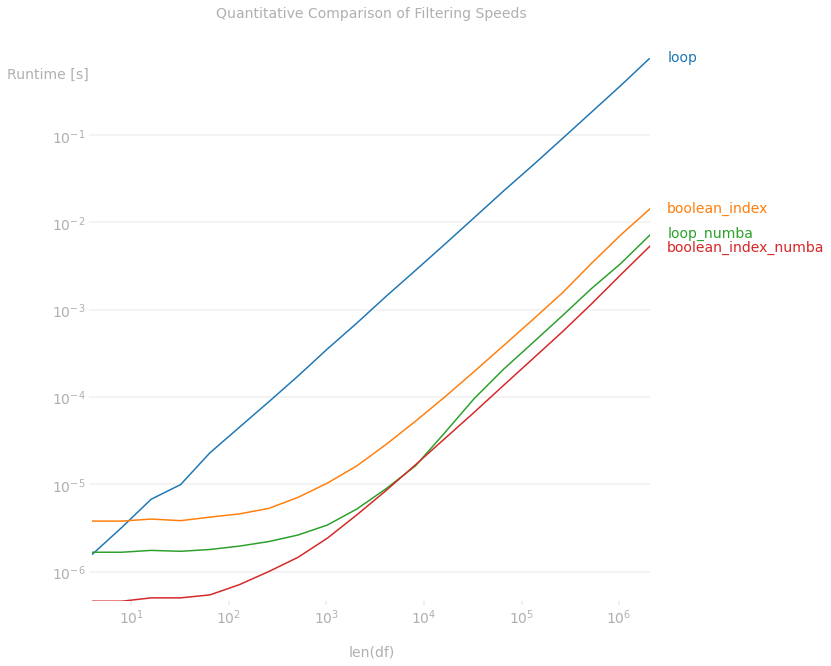

In [179]:
import perfplot

plt.figure(figsize=(10, 10))
plt.title('Quantitative Comparison of Filtering Speeds')
perfplot.show(
    setup= random_array,
    kernels=[loop, boolean_index, loop_numba, boolean_index_numba],
    n_range=[2**k for k in range(2, 22)],
    logx=True,
    logy=True,
    equality_check=False,
    xlabel='len(df)')